In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 問1: 図示

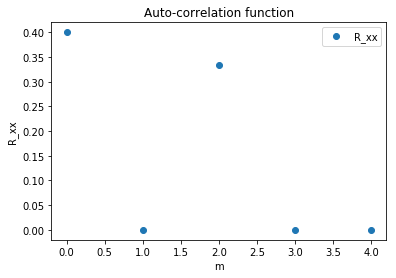

In [2]:
r_xx_1 = [2/5, 0, 1/3, 0, 0]
m = list(range(5))
%matplotlib inline
plt.plot(m, r_xx_1,'o', label='R_xx')
plt.legend()
plt.title("Auto-correlation function")
plt.xlabel("m")
plt.ylabel("R_xx")
plt.show()

## 問3: 図示

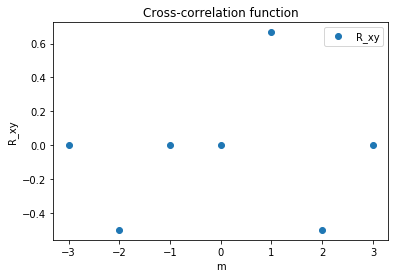

In [3]:
r_xy_3 = [0, -1/2, 0, 0, 2/3, -1/2, 0]
m = list(range(-3, 4))
plt.plot(m, r_xy_3,'o', label='R_xy')
plt.legend()
plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("R_xy")
plt.show()

# 問5

In [40]:
x_n = np.array([1.0, 0.0, 1.0, 0.0, 0.0])

In [41]:
def auto_corr (x, m):
    if m == 0:
        corr_sum = (x * x).sum()
    else:
        corr_sum = (x[:-m] * x[m:]).sum()
    r_xx = (1 / (x.shape[0] - abs(m))) * corr_sum
    return r_xx

In [46]:
def auto_corr_function (x_n):
    m = range(x_n.shape[0])
    r_xx = []
    for i in m:
        r_xx.append(auto_corr(x_n, i))
#     r_xx = r_xx[::-1] + r_xx[1:]
    return np.array(r_xx)

In [47]:
r_xx_5 = auto_corr_function(x_n)
print(r_xx_5)

[0.40000000000000002, 0.0, 0.33333333333333331, 0.0, 0.0]


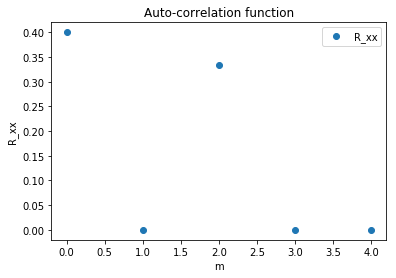

In [49]:
m = list(range(len(x_n)))
plt.plot(m, r_xx_5,'o', label='R_xx')
plt.legend()
plt.title("Auto-correlation function")
plt.xlabel("m")
plt.ylabel("R_xx")
plt.show()

# 問6

In [26]:
x_n = np.array([0.0, 1.0, -1.0, 0.0])
y_n = np.array([1.0, 1.0, 1.0, -1.0])

In [27]:
def cross_corr (x, y, m):
    if m == 0:
        corr_sum = (x * y).sum()
    elif m < 0:
        corr_sum = (x[-m:] * y[:m]).sum()
    else:
        corr_sum = (x[:-m] * y[m:]).sum()
    r_xx = (1 / (x.shape[0] - abs(m))) * corr_sum
    return r_xx

In [31]:
def cross_corr_function (x_n, y_n):
    signal_size = x_n.shape[0]
    m = range(-signal_size + 1, signal_size)
    r_xy = []
    for i in m:
        r_xy.append(cross_corr(x_n, y_n, i))
    return np.array(r_xy)

In [32]:
r_xy_6 = cross_corr_function(x_n, y_n)
print(r_xy_6)

[0.0, -0.5, 0.0, 0.0, 0.66666666666666663, -0.5, 0.0]


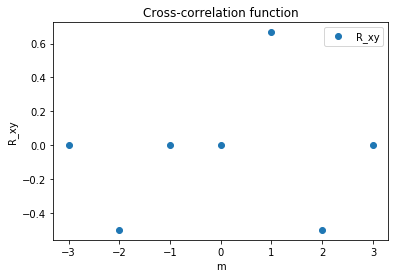

In [30]:
m = list(range(-len(y_n)+1,len(y_n)))
plt.plot(m, r_xy_6,'o', label='R_xy')
plt.legend()
plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("R_xy")
plt.show()

# 問7

In [64]:
y_n = np.array([0.0, 0.0, 0.0, 0.0, 0.1, 0.42, 0.72, 0.58, 0.0, -0.58, -0.72, -0.42, -0.10, 0.0, 0.0, 0.0])
x1_n = np.array([0.0, 0.1, 0.42, 0.72, 0.58, 0.0 -0.58, -0.72, -0.42, -0.10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x2_n = x1_n + 0.7
x3_n = 1.5 * x1_n

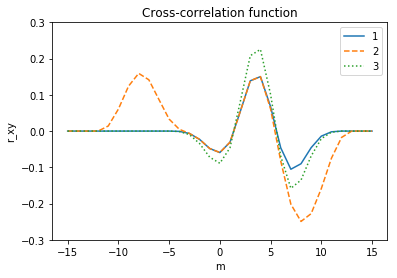

In [84]:
""" Cross-correlation function """
m = list(range(-len(y_n)+1, len(y_n)))
r_x1y_7 = cross_corr_function(x1_n, y_n)
r_x2y_7 = cross_corr_function(x2_n, y_n)
r_x3y_7 = cross_corr_function(x3_n, y_n)

plt.plot(m, r_x1y_7, label = "1")
plt.plot(m, r_x2y_7, '--', label = "2")
plt.plot(m, r_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-correlation function")
plt.xlabel("m")
plt.ylabel("r_xy")
plt.ylim([-0.3,0.3])
plt.show()

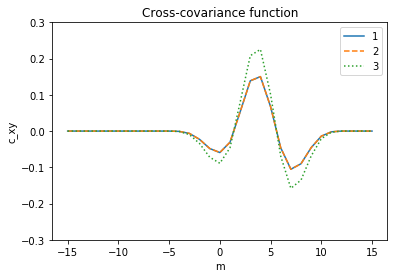

In [83]:
""" Cross-covariance function """
def cross_cova (x, y, m):
    if m == 0:
        cova_sum = (x * y).sum()
    elif m < 0:
        cova_sum = ((x[-m:]) * (y[:m])).sum()
    else:
        cova_sum = ((x[:-m]) * (y[m:])).sum()
    c_xx = (1 / (x.shape[0] - abs(m))) * cova_sum
    return c_xx

def cross_cova_function (x_n, y_n):
    mean_x = np.mean(x_n)
    mean_y = np.mean(y_n)
    x_n = x_n - mean_x
    y_n = y_n - mean_y
    signal_size = x_n.shape[0]
    m = range(-signal_size + 1, signal_size)
    c_xy = []
    for i in m:
        c_xy.append(cross_cova(x_n, y_n, i))
    return np.array(c_xy)

c_x1y_7 = cross_cova_function(x1_n, y_n)
c_x2y_7 = cross_cova_function(x2_n, y_n)
c_x3y_7 = cross_cova_function(x3_n, y_n)

# print(np.max(c_x1y_7))

plt.plot(m, c_x1y_7, label = "1")
plt.plot(m, c_x2y_7, '--', label = "2")
plt.plot(m, c_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-covariance function")
plt.xlabel("m")
plt.ylabel("c_xy")
plt.ylim([-0.3,0.3])
plt.show()

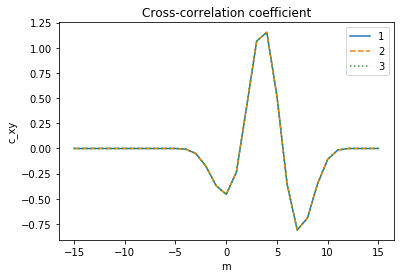

In [82]:
""" Cross-correlation coefficient """
def auto_cova (x, m):
    if m == 0:
        cova_sum = (x * x).sum()
    else:
        cova_sum = (x[:-m] * x[m:]).sum()
    c_xx = (1 / (x.shape[0] - abs(m))) * cova_sum
    return c_xx

def auto_cova_function (x_n):
    mean_x = np.mean(x_n)
    x_n = x_n - mean_x
    m = range(x_n.shape[0])
    c_xx = []
    for i in m:
        c_xx.append(auto_cova(x_n, i))
#     c_xx = c_xx[::-1] + c_xx[1:]
    return np.array(c_xx)


import math
var_y_n = auto_cova_function(y_n)[0]
var_x1_n = auto_cova_function(x1_n)[0]
var_x2_n = auto_cova_function(x2_n)[0]
var_x3_n = auto_cova_function(x3_n)[0]

cc_x1y_7 = cross_cova_function(x1_n, y_n) / math.sqrt(var_y_n * var_x1_n)
cc_x2y_7 = cross_cova_function(x2_n, y_n) / math.sqrt(var_y_n * var_x2_n)
cc_x3y_7 = cross_cova_function(x3_n, y_n) / math.sqrt(var_y_n * var_x3_n)

# print(math.sqrt(var_y_n * var_x1_n))

plt.plot(m, cc_x1y_7, label = "1")
plt.plot(m, cc_x2y_7, '--', label = "2")
plt.plot(m, cc_x3y_7, ':', label = "3")
plt.legend()

plt.title("Cross-correlation coefficient")
plt.xlabel("m")
plt.ylabel("c_xy")
# plt.ylim([-0.3,0.3])
plt.show()